## <span style='color:#ff5f27'> 📝 Imports

In [1]:
!pip install -r requirements.txt -q

In [2]:
import config
import pandas as pd

from functions.utils import (
    load_image,
    show_image,
    download_and_extract_zip,
)
from functions.donut import (
    load_cheque_parser,
    parse_text,
)
from features.cheque import (
    spell_check,
    amount_letter_number_match,
    get_amount_match_column,
)

2024-05-07 12:50:06,474 INFO: generated new fontManager


## <span style='color:#ff5f27'>🗄️ Data Loading

In [ ]:
download_and_extract_zip(config.DOWNLOAD_URL)

In [2]:
data = pd.read_csv('data/res.csv')
data.columns = data.columns.str.lower()
data.rename(
    columns={
        'value_letters': 'amount_in_text',
        'value_numbers': 'amount_in_numbers',
    }, 
    inplace=True,
)
data.head()

,cheque_no,user1,user2,amount_in_text,amount_in_numbers,signature_file,bank_name,user2name,valid
0,1,24,18,Three Thousand Seven Hundred and Fifty Five,3755,120.png,axis,Edmee Pelletier,1
1,2,14,14,Three Thousand One Hundred and Sixty Eight,3168,71.png,axis,Renata Lukic,1
2,3,15,32,Six Thousand Nine Hundred and Forty Two,6942,76.png,axis,Chelsea Watson,1
3,4,27,5,Nine Thousand Five Hundred and Forty One,9541,137.png,axis,Fawwaz Zuhayr Mustafa,1
4,5,5,24,Two Thousand Nine Hundred and Twelve,2912,26.png,axis,Clarice Blanc,1


In [3]:
data.bank_name.value_counts()

bank_name
axis           1000
Agricole       1000
Banque         1000
canara         1000
HSBC           1000
ICICI          1000
Saudi          1000
Attejari       1000
Biat           1000
Universelle    1000
Name: count, dtype: int64

In [4]:
data.valid.value_counts()

valid
1    8000
0    2000
Name: count, dtype: int64

## <span style='color:#ff5f27'> 👨🏻‍🎨 Data Visualization

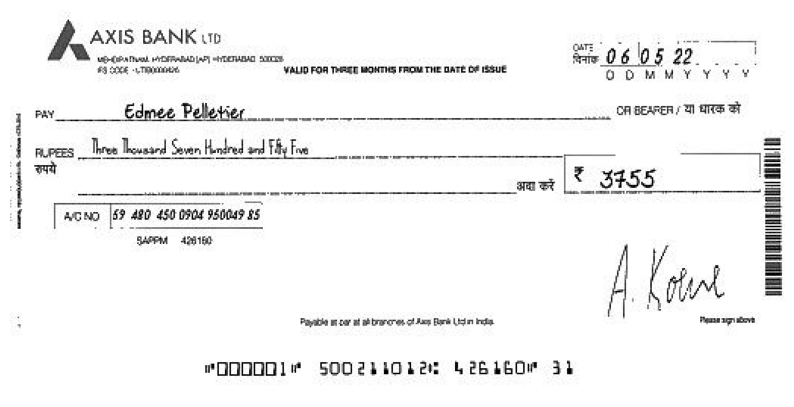

In [5]:
image1 = load_image('1.jpg')

show_image(image1)

In [6]:
data.head(1)

,cheque_no,user1,user2,amount_in_text,amount_in_numbers,signature_file,bank_name,user2name,valid
0,1,24,18,Three Thousand Seven Hundred and Fifty Five,3755,120.png,axis,Edmee Pelletier,1


In [7]:
data[data.valid==0].head(5)

,cheque_no,user1,user2,amount_in_text,amount_in_numbers,signature_file,bank_name,user2name,valid
500,501,4,41,One Thousand and Five,3708,Nan,axis,Germa de Geus,0
501,502,38,31,Three Hundred and Thirty Six,3318,Nan,axis,Naomi Grant,0
502,503,35,27,,8999,177.png,axis,Colette Monjeau,0
503,504,36,3,Three Thousand and Fifty Seven,3707,Nan,axis,Jiang Li Tao,0
504,505,13,27,Nineteen,,68.png,axis,Colette Monjeau,0


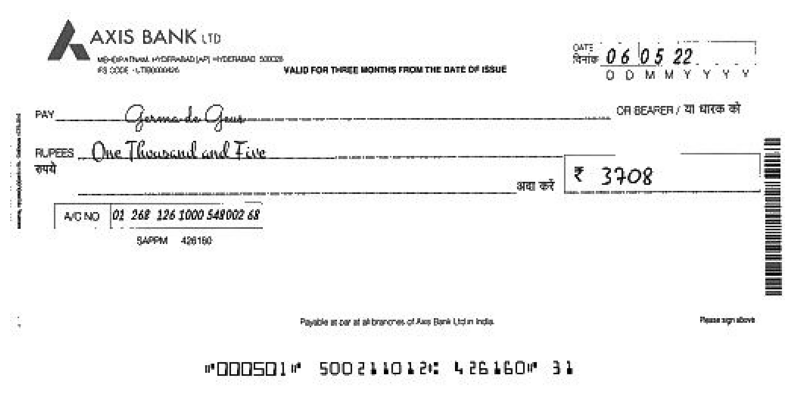

In [8]:
image501 = load_image('501.jpg')
show_image(image501)

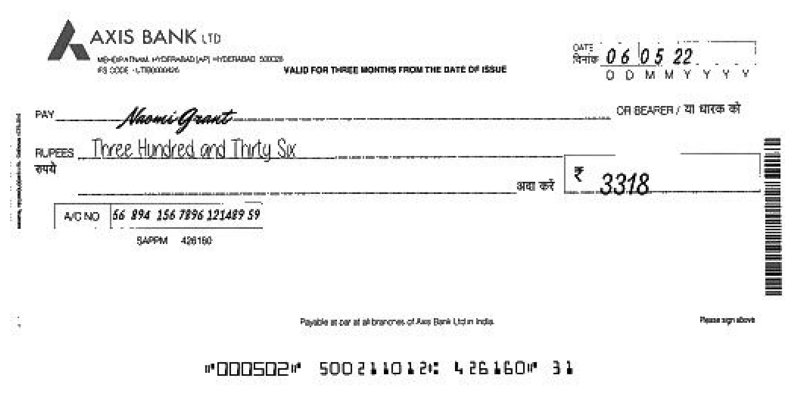

In [9]:
image502 = load_image('502.jpg')
show_image(image502)

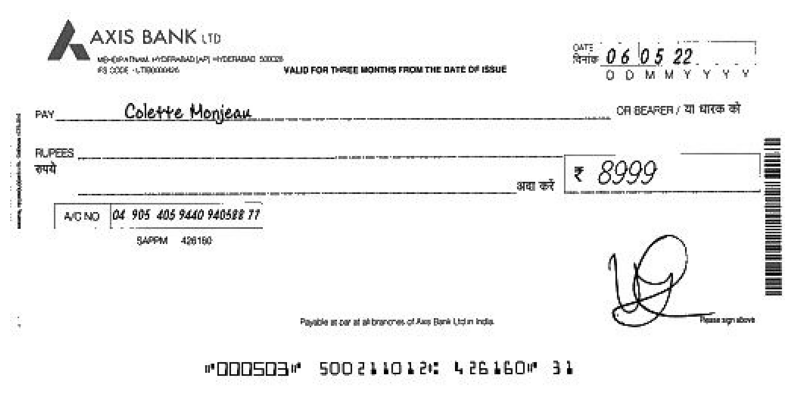

In [11]:
image503 = load_image('503.jpg')
show_image(image503)

## <span style='color:#ff5f27'>👩🏻‍🔬 Feature Engineering </span>


### <span style='color:#ff5f27'>⛳️ Spell Check </span>


In [12]:
spell_check('Three Thousand Seven Hundred and Fifty Five')

(True, 'three thousand seven hundred and fifty five')

In [13]:
spell_check('Threee Thousand Seven Hundred and Fifty Five')

(False, 'three thousand seven hundred and fifty five')

In [14]:
spell_check('for thousand seven hundred and thirty six')

(True, 'for thousand seven hundred and thirty six')

In [15]:
spell_check(' ')

(False, 'missing')

In [16]:
spell_check('missing')

(False, 'missing')

In [17]:
data[['spelling_is_correct', 'amount_in_text_corrected']] = data['amount_in_text'].apply(
    lambda x: pd.Series(spell_check(x))
)
data.head(3)

,cheque_no,user1,user2,amount_in_text,amount_in_numbers,signature_file,bank_name,user2name,valid,spelling_is_correct,amount_in_text_corrected
0,1,24,18,Three Thousand Seven Hundred and Fifty Five,3755,120.png,axis,Edmee Pelletier,1,True,three thousand seven hundred and fifty five
1,2,14,14,Three Thousand One Hundred and Sixty Eight,3168,71.png,axis,Renata Lukic,1,True,three thousand one hundred and sixty eight
2,3,15,32,Six Thousand Nine Hundred and Forty Two,6942,76.png,axis,Chelsea Watson,1,True,six thousand nine hundred and forty two


In [18]:
data[(data.amount_in_text == ' ')].head(3)

,cheque_no,user1,user2,amount_in_text,amount_in_numbers,signature_file,bank_name,user2name,valid,spelling_is_correct,amount_in_text_corrected
502,503,35,27,,8999,177.png,axis,Colette Monjeau,0,False,missing
505,506,5,1,,7989,28.png,axis,Emily D. Short,0,False,missing
507,508,29,4,,5113,149.png,axis,Wafiyah Nashwa Wasem,0,False,missing


### <span style='color:#ff5f27'>⛳️ Amount in Letter and Number Match </span>


In [19]:
amount_letter_number_match('three thousand seven hundred and fifty five', '3755')

True

In [20]:
amount_letter_number_match('ThreeE Thousand Eight Hundred and Twenty Three', '7203')

False

In [21]:
amount_letter_number_match('missing', '3754')

(False, 'Amount in words is missing')

In [22]:
amount_letter_number_match('Three Thousand Eight', 'missing')

(False, 'Amount in numbers is missing')

In [23]:
data['amount_letter_number_match'] = data[['amount_in_text_corrected', 'amount_in_numbers']].apply(
    lambda x: get_amount_match_column(x.iloc[0], x.iloc[1]), 
    axis=1,
)
data.head(3)

,cheque_no,user1,user2,amount_in_text,amount_in_numbers,signature_file,bank_name,user2name,valid,spelling_is_correct,amount_in_text_corrected,amount_letter_number_match
0,1,24,18,Three Thousand Seven Hundred and Fifty Five,3755,120.png,axis,Edmee Pelletier,1,True,three thousand seven hundred and fifty five,True
1,2,14,14,Three Thousand One Hundred and Sixty Eight,3168,71.png,axis,Renata Lukic,1,True,three thousand one hundred and sixty eight,True
2,3,15,32,Six Thousand Nine Hundred and Forty Two,6942,76.png,axis,Chelsea Watson,1,True,six thousand nine hundred and forty two,True


In [24]:
condition = (data['spelling_is_correct'] == False) & (data['amount_letter_number_match'] == False)

data.loc[condition, 'valid'] = 0

data[condition].head(3)

,cheque_no,user1,user2,amount_in_text,amount_in_numbers,signature_file,bank_name,user2name,valid,spelling_is_correct,amount_in_text_corrected,amount_letter_number_match
502,503,35,27,,8999,177.png,axis,Colette Monjeau,0,False,missing,False
505,506,5,1,,7989,28.png,axis,Emily D. Short,0,False,missing,False
507,508,29,4,,5113,149.png,axis,Wafiyah Nashwa Wasem,0,False,missing,False


In [25]:
data.valid.value_counts()

valid
1    6410
0    3590
Name: count, dtype: int64

## <span style="color:#ff5f27;"> 🔮 Connecting to Hopsworks Feature Store </span>

In [26]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store() 

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://snurran.hops.works/p/11385
Connected. Call `.close()` to terminate connection gracefully.


## <span style="color:#ff5f27;"> 🪄 Feature Group Creation </span>

In [27]:
# Get or create the 'cheque_fg' feature group
cheque_fg = fs.get_or_create_feature_group(
    name="cheque_fg",
    description='Parsed Cheque Information',
    primary_key=['cheque_no'],
    version=1,
)

cheque_fg.insert(data)

Uploading Dataframe: 0.00% |          | Rows 0/10000 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: cheque_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://snurran.hops.works/p/11385/jobs/named/cheque_fg_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f2800692e30>, None)

---